In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('fifa_players.csv')

In [173]:
pd.set_option('display.max_columns', None)

In [174]:
df.shape

(17954, 51)

In [175]:
df.head()

name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential   value_euro  \
0        72.1   CF,RW,ST   Argentina              94         94  110500000.0   
1        76.2  CAM,RM,CM     Denmark              88         89   69500000.0   
2        83.9     CM,CAM      France              88         91   73000000.0   
3        59.0      LW,ST       Italy              88         88   62000000.0   
4        88.9         CB     Senegal              88         91   60000000.0   

   wage_euro preferred_foot  international_reputation(1-5)  weak_foot(1-5)  \
0   565000.0           Left                              5               4   
1   205000.0          Right                              3               5   
2   255000.0          Right                              4               4   
3   165000.0          Right                              3               4   
4   135000.0          Right                              3               3   

   skill_moves(1-5) body_type  release_clause_euro national_team  \
0                 4     Messi          226500000.0     Argentina   
1                 4      Lean          133800000.0       Denmark   
2                 5    Normal          144200000.0        France   
3                 4    Normal          105400000.0         Italy   
4                 2    Normal          106500000.0           NaN   

   national_rating national_team_position  national_jersey_number  crossing  \
0             82.0                     RF                    10.0        86   
1             78.0                    CAM                    10.0        88   
2             84.0                    RDM                     6.0        80   
3             83.0                     LW                    10.0        86   
4              NaN                    NaN                     NaN        30   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0         95                70             92       86         97     93   
1         81                52             91       80         84     86   
2         75                75             86       85         87     85   
3         77                56             85       74         90     87   
4         22                83             68       14         69     28   

   freekick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                 94            89            96            91            86   
1                 87            89            91            76            73   
2                 82            90            90            71            79   
3                 77            78            93            94            86   
4                 28            60            63            70            75   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0       93         95       95          85       68       72        66   
1       80         88       81          84       50       92        58   
2       76         82       66          90       83       88        87   
3       94         83       93          75       53       75        44   
4       50         82       40          55       81       75        94   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0          94          48             22           94      94         75   
1          89          46             56           84      91         67   
2          82          78             64           82      88         82   
3          84        

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

#### Описание полей:

| Поле                          | Описание                                      |
| ----------------------------- | --------------------------------------------- |
| name                          | Имя игрока                                    |
| full_name                     | Полное имя игрока                             |
| birth_date                    | Дата рождения игрока                          |
| age                           | Возраст игрока                                |
| height_cm                     | Рост игрока в сантиметрах                     |
| weight_kgs                    | Вес игрока в килограммах                      |
| positions                     | Позиции, на которых может играть игрок        |
| nationality                   | Национальность игрока                         |
| overall_rating                | Общий рейтинг игрока в FIFA                   |
| potential                     | Потенциальный рейтинг игрока в FIFA           |
| value_euro                    | Рыночная стоимость игрока (в евро)            |
| wage_euro                     | Еженедельная зарплата игрока (в евро)         |
| preferred_foot                | Ведущая нога игрока                           |
| international_reputation(1–5) | Международная репутация (оценка от 1 до 5)    |
| weak_foot(1–5)                | Уровень слабой ноги (оценка от 1 до 5)        |
| skill_moves(1–5)              | Навыки финтов (оценка от 1 до 5)              |
| body_type                     | Тип телосложения игрока                       |
| release_clause_euro           | Сумма отступных (в евро)                      |
| national_team                 | Национальная сборная, за которую играет игрок |
| national_rating               | Рейтинг игрока в сборной                      |
| national_team_position        | Позиция игрока в национальной сборной         |
| national_jersey_number        | Номер на футболке в сборной                   |
| crossing                      | Навык навесов                                 |
| finishing                     | Навык завершения атак (удары по воротам)      |
| heading_accuracy              | Точность ударов головой                       |
| short_passing                 | Навык коротких передач                        |
| volleys                       | Навык ударов с лёта                           |
| dribbling                     | Навык дриблинга                               |
| curve                         | Эффектность ударов (закручивание мяча)        |
| freekick_accuracy             | Точность исполнения штрафных ударов           |
| long_passing                  | Навык длинных передач                         |
| ball_control                  | Контроль мяча                                 |
| acceleration                  | Ускорение                                     |
| sprint_speed                  | Скорость спринта                              |
| agility                       | Ловкость                                      |
| reactions                     | Реакция                                       |
| balance                       | Баланс                                        |
| shot_power                    | Сила удара                                    |
| jumping                       | Прыжковая способность                         |
| stamina                       | Выносливость                                  |
| strength                      | Физическая сила                               |
| long_shots                    | Удары с дальних дистанций                     |
| aggression                    | Агрессивность                                 |
| interceptions                 | Перехваты                                     |
| positioning                   | Умение занимать позицию в атаке               |
| vision                        | Видение поля                                  |
| penalties                     | Исполнение пенальти                           |
| composure                     | Хладнокровие                                  |
| marking                       | Опека соперников                              |
| standing_tackle               | Отбор мяча в стойке                           |
| sliding_tackle                | Подкат                                        |


По большому счёту можно сразу сказать, что хранить name и full_name вместе не имеет смысла - они несут одинаковую информацию. Есть смысл удалить name.

Аналогично можно сказать про дату рождения и возраст - они зависят друг от друга. Есть смысл удалить одно из них - лучше удалить birth_date, так как моделям в будущем, а также в статистических тестах проще работать с числовыми признаками.

In [177]:
df.drop(['name', 'birth_date'], axis=1, inplace=True)

In [178]:
df.describe()

age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.131339   
min       17.000000    152.400000     49.900000       47.000000     48.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       71.000000     75.000000   
max       46.000000    205.740000    110.200000       94.000000     95.000000   

         value_euro      wage_euro  international_reputation(1-5)  \
count  1.769900e+04   17708.000000                   17954.000000   
mean   2.479280e+06    9902.134628                       1.111674   
std    5.687014e+06   21995.593750                       0.392168   
min    1.000000e+04    1000.000000                       1.000000   
25%    3.250000e+05    1000.000000                       1.000000   
50%    7.000000e+05    3000.000000                       1.000000   
75%    2.100000e+06    9000.000000                       1.000000   
max    1.105000e+08  565000.000000                       5.000000   

       weak_foot(1-5)  skill_moves(1-5)  release_clause_euro  national_rating  \
count    17954.000000      17954.000000         1.611700e+04       857.000000   
mean         2.945695          2.361034         4.622522e+06        76.341890   
std          0.663691          0.763223         1.129077e+07         4.786667   
min          1.000000          1.000000         1.300000e+04        63.000000   
25%          3.000000          2.000000         5.250000e+05        73.000000   
50%          3.000000          2.000000         1.200000e+06        75.000000   
75%          3.000000          3.000000         3.500000e+06        81.000000   
max          5.000000          5.000000         2.265000e+08        85.000000   

       national_jersey_number      crossing     finishing  heading_accuracy  \
count              857.000000  17954.000000  17954.000000      17954.000000   
mean                12.456243     49.697672     45.358249         52.148212   
std                  8.098157     18.483310     19.640792         17.521819   
min                  1.000000      5.000000      2.000000          4.000000   
25%                  6.000000     38.000000     30.000000         44.000000   
50%                 12.000000     54.000000     49.000000         56.000000   
75%                 18.000000     64.000000     62.000000         64.000000   
max                 99.000000     93.000000     95.000000         94.000000   

       short_passing       volleys     dribbling         curve  \
count   17954.000000  17954.000000  17954.000000  17954.000000   
mean       58.566058     42.755208     55.278991     47.101147   
std        14.863178     17.802936     19.091876     18.536621   
min         7.000000      3.000000      4.000000      6.000000   
25%        53.000000     30.000000     49.000000     34.000000   
50%        62.000000     44.000000     61.000000     49.000000   
75%        68.000000     57.000000     68.000000     62.000000   
max        93.000000     90.000000     97.000000     94.000000   

       freekick_accuracy  long_passing  ball_control  acceleration  \
count       17954.000000  17954.000000  17954.000000  17954.000000   
mean           42.688092     52.667428     58.223906     64.696224   
std            17.565634     15.421545     16.875717     15.001345   
min             3.000000      9.000000      5.000000     12.000000   
25%            30.000000     43.000000     54.000000     57.000000   
50%            41.000000     56.000000     63.000000     67.000000   
75%            56.000000     64.000000     69.000000     75.000000   
max            94.000000     93.000000     96.000000     97.000000 

In [179]:
categories = df.select_dtypes(exclude=[np.number])
categories.describe()

full_name positions nationality preferred_foot body_type  \
count          17954     17954       17954          17954     17954   
unique         17898       890         160              2        10   
top     Adama Traoré        CB     England          Right    Normal   
freq               3      2243        1658          13781     10393   

       national_team national_team_position  
count            857                    857  
unique           103                     29  
top         Scotland                    SUB  
freq              23                    389

In [180]:
df.columns.values

array(['full_name', 'age', 'height_cm', 'weight_kgs', 'positions',
       'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility',
       'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'marking',
       'standing_tackle', 'sliding_tackle'], dtype=object)

In [181]:
df.duplicated().sum()

np.int64(0)

In [182]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

national_jersey_number    17097
national_team_position    17097
national_rating           17097
national_team             17097
release_clause_euro        1837
value_euro                  255
wage_euro                   246
dtype: int64

Удалим столбцы, где очень много пропусков - они бесполезны для общей выборки.

In [183]:
df.drop(['national_jersey_number', 'national_team_position', 'national_rating', 'national_team'], axis=1, inplace=True)

In [184]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

release_clause_euro    1837
value_euro              255
wage_euro               246
dtype: int64

In [185]:
numeric_cols = df.select_dtypes(include=np.number).columns

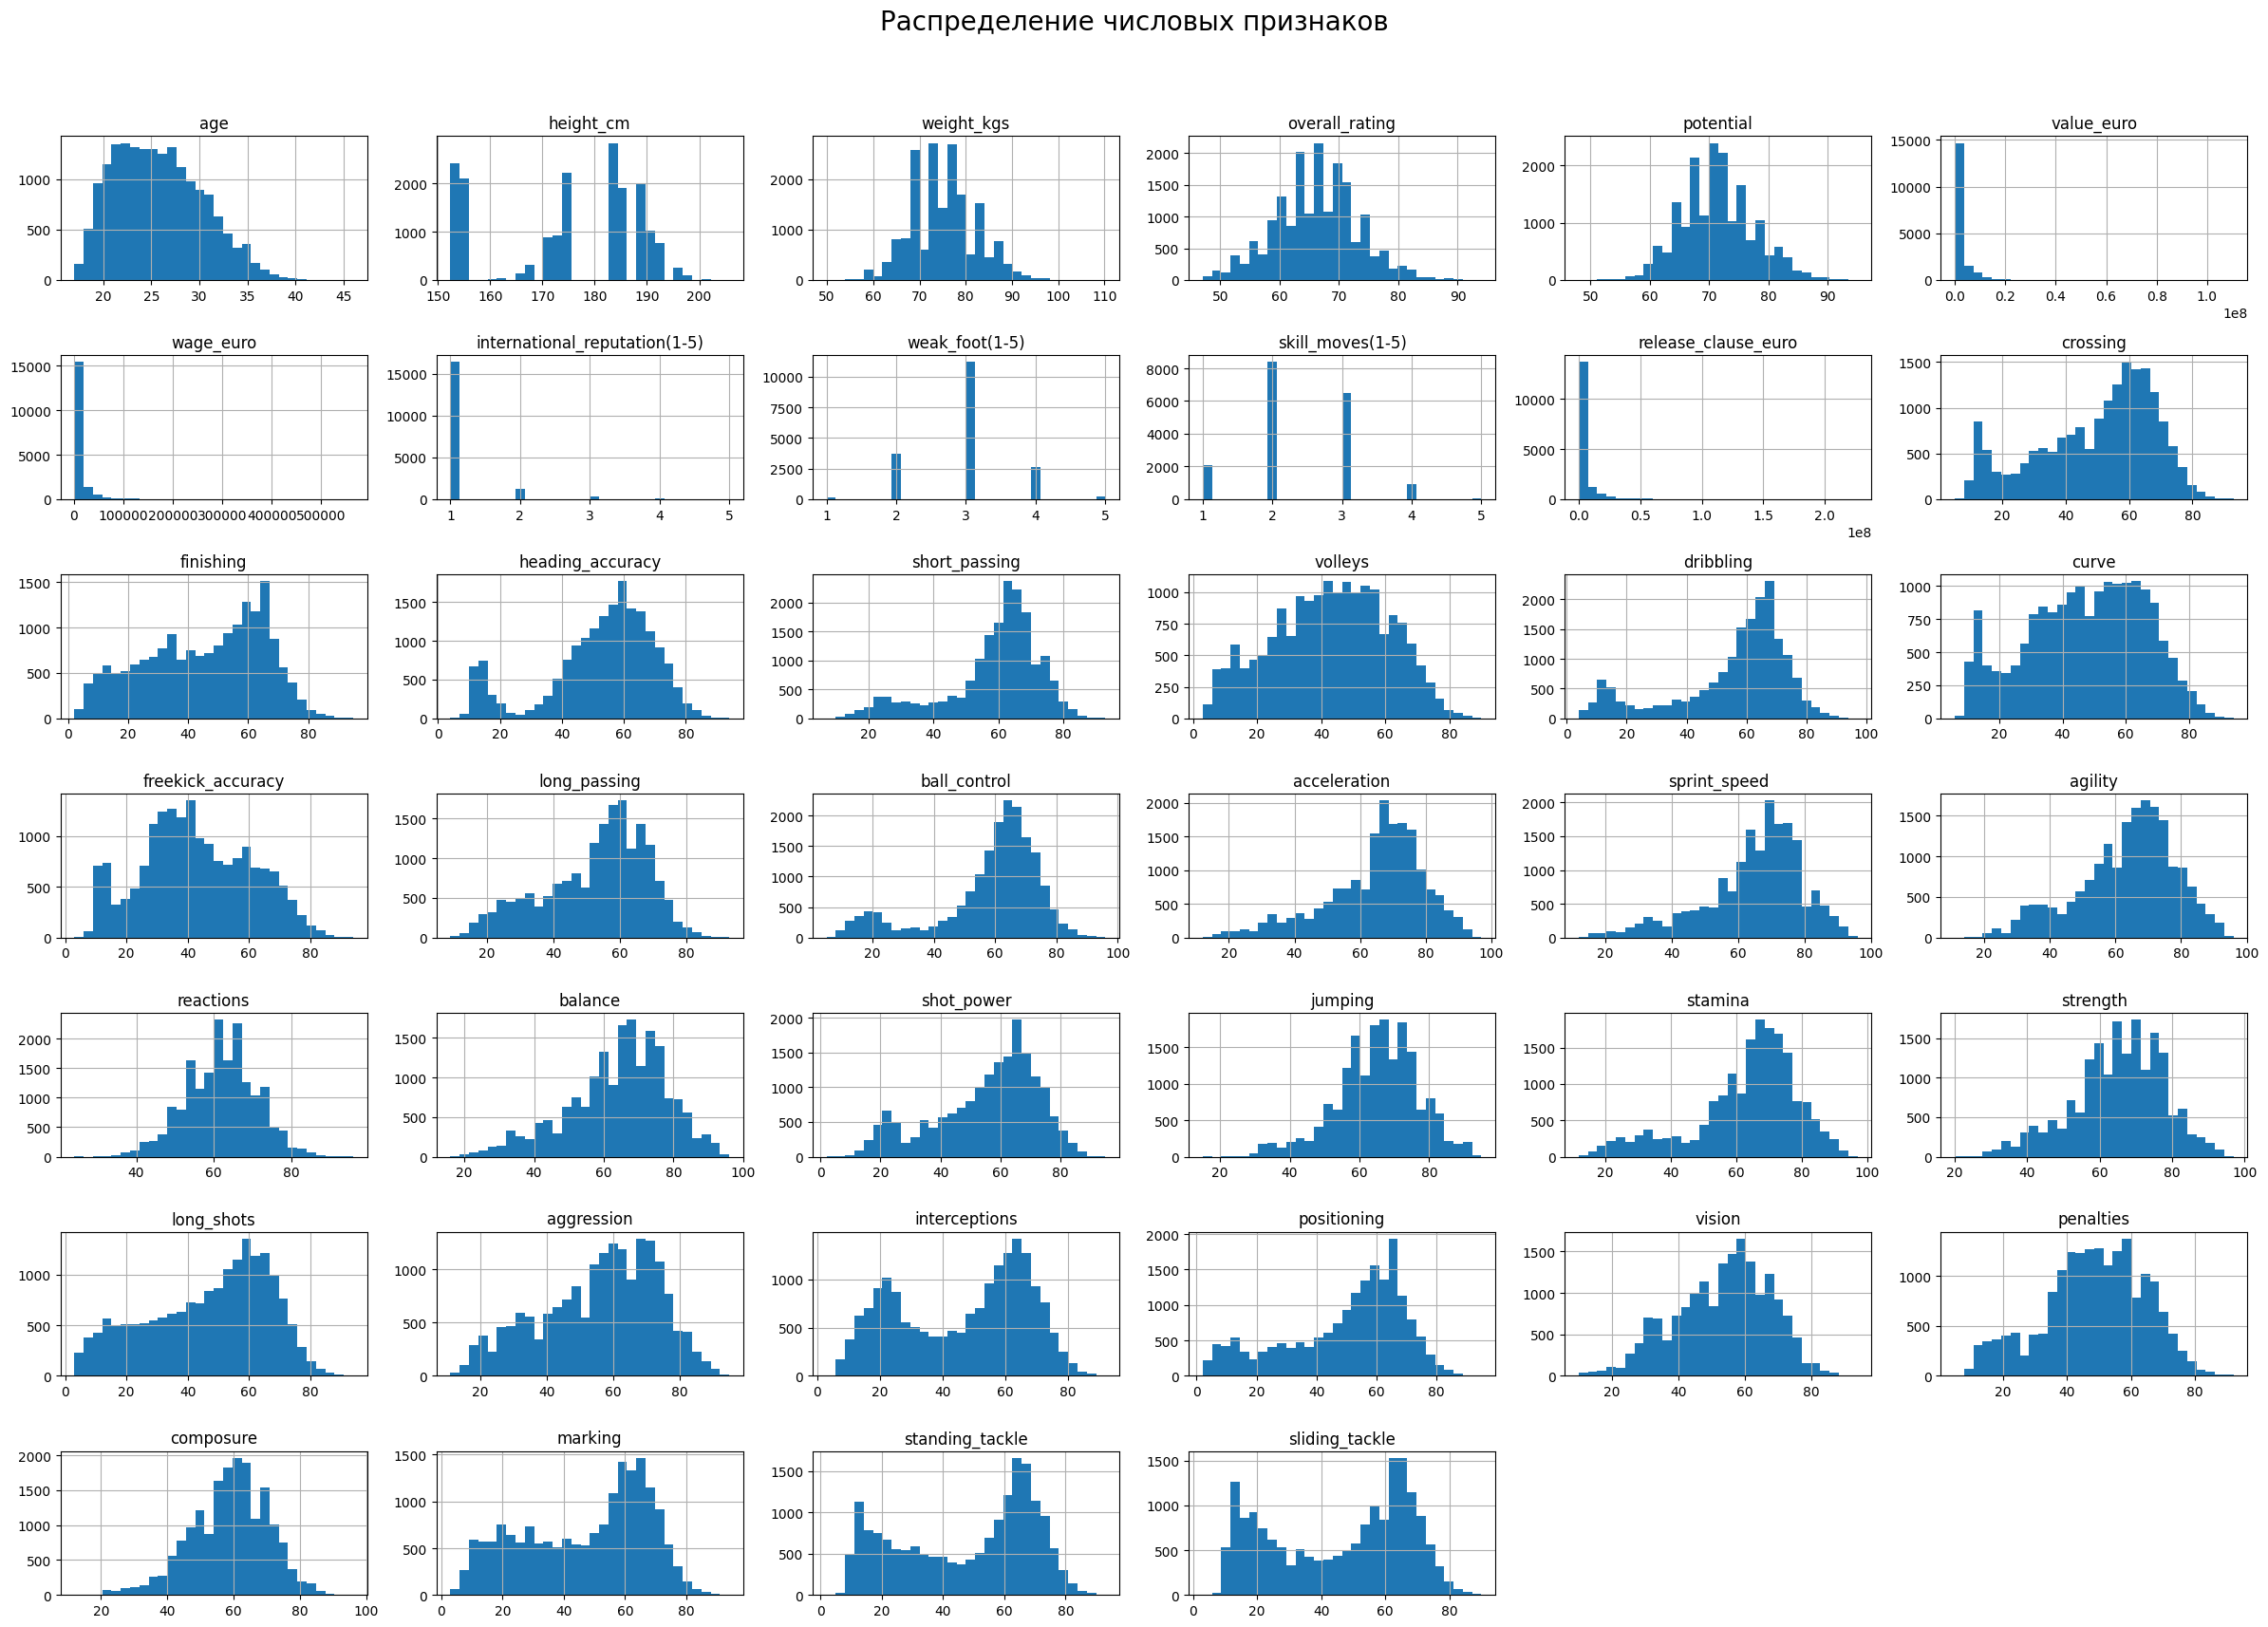

In [186]:
df[numeric_cols].hist(figsize=(24, 18), bins=30)
plt.suptitle('Распределение числовых признаков', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

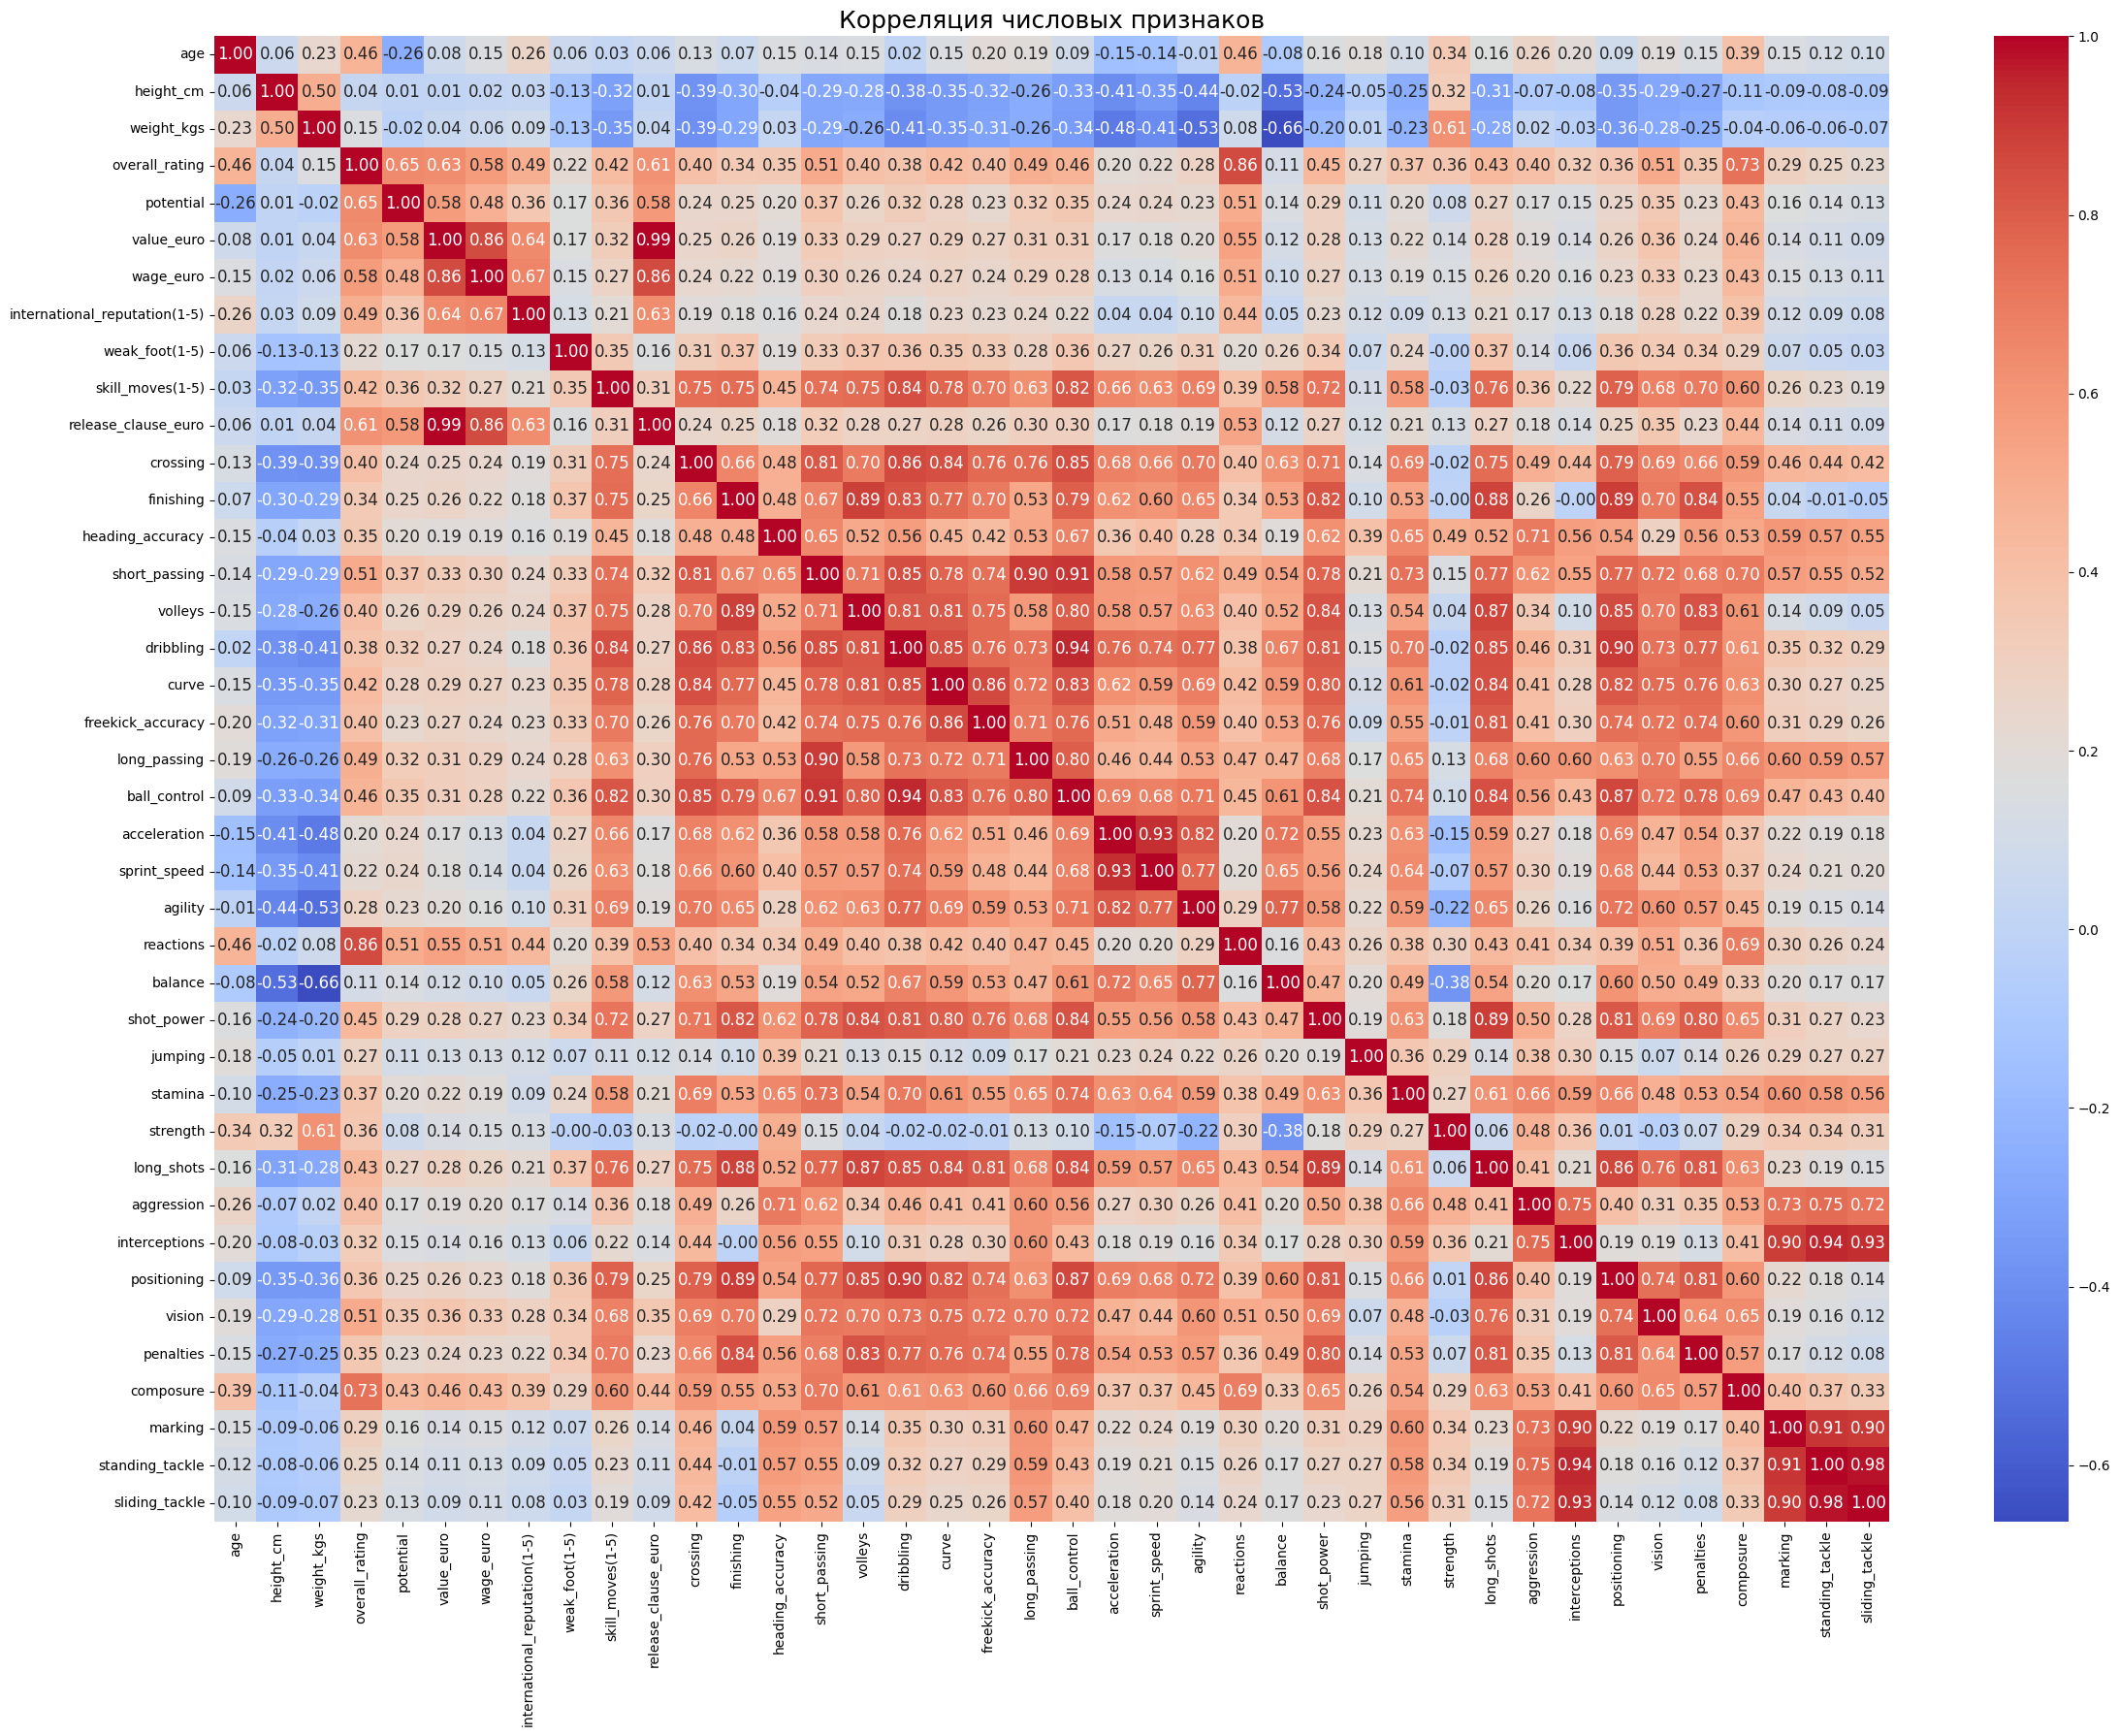

In [187]:
plt.figure(figsize=(24, 18))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":12})
plt.title("Корреляция числовых признаков", fontsize=18)
plt.tight_layout()
plt.show()

Видим, что в матрице корреляций корреляция Пирсона между полями release_clause_euro и value_euro равна 0.99 - признаки линейно зависимы. Учитывая, что у release_clause_euro довольно много пропусков, есть смысл удалить этот признак.

In [188]:
df.drop('release_clause_euro', axis=1, inplace=True)
numeric_cols = df.select_dtypes(include=np.number).columns

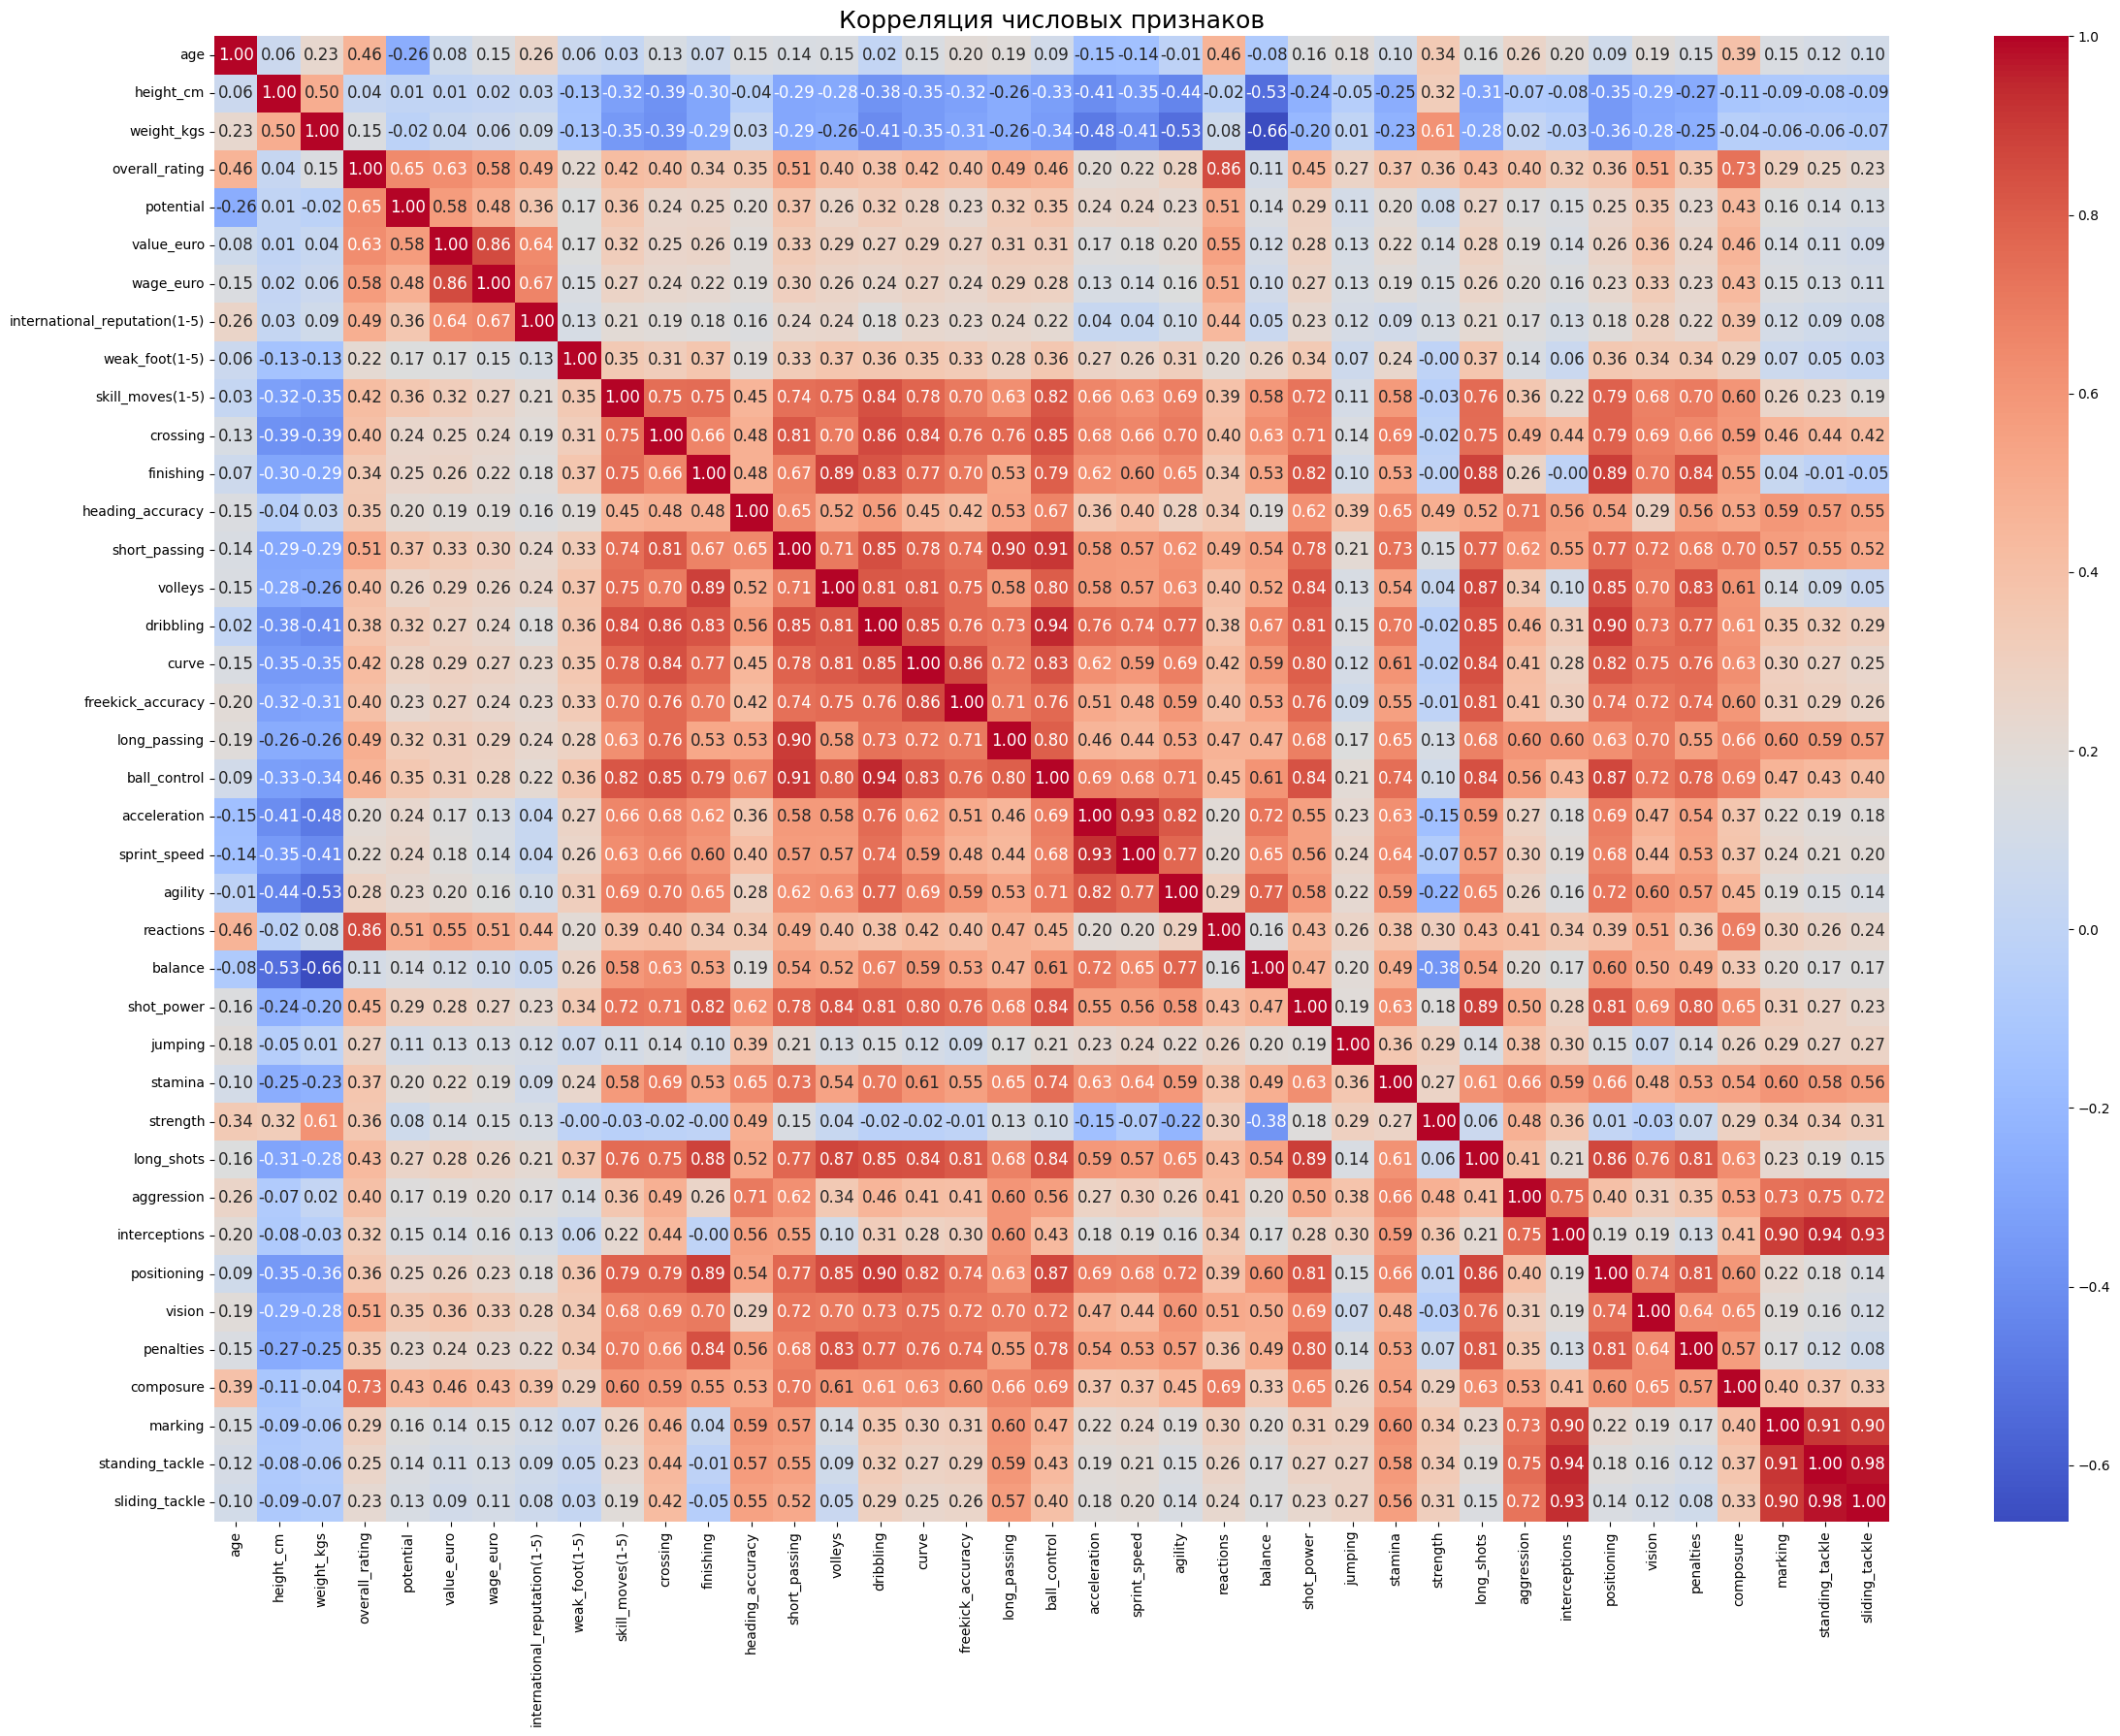

In [189]:
plt.figure(figsize=(24, 18))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size":12})
plt.title("Корреляция числовых признаков", fontsize=18)
plt.tight_layout()
plt.show()

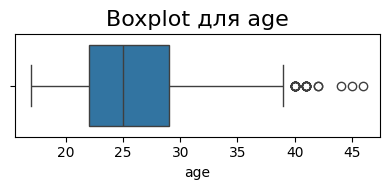

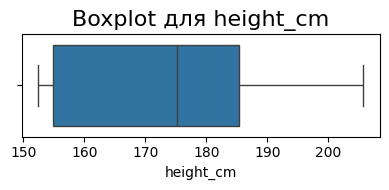

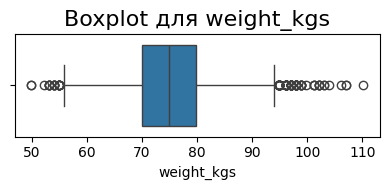

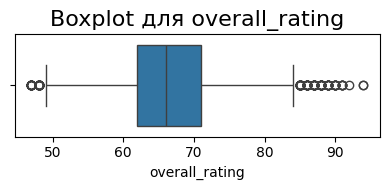

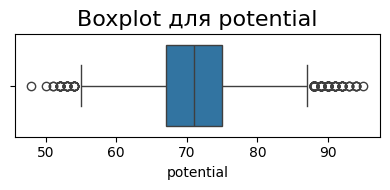

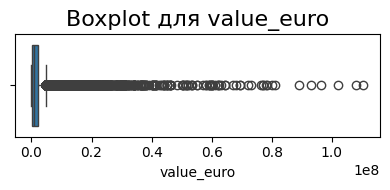

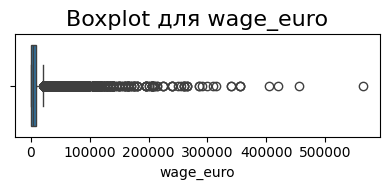

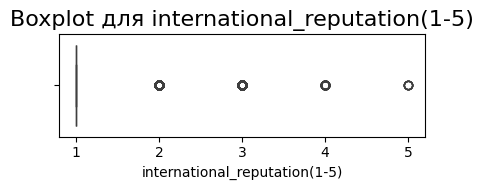

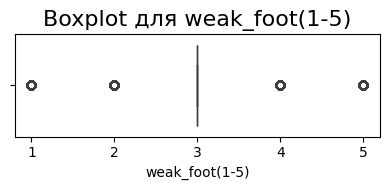

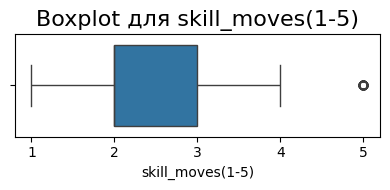

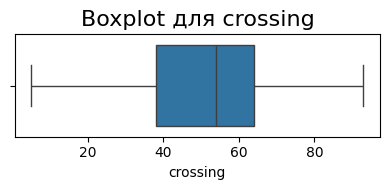

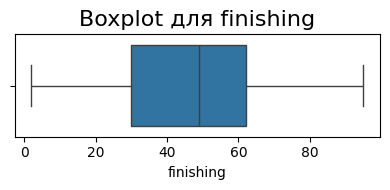

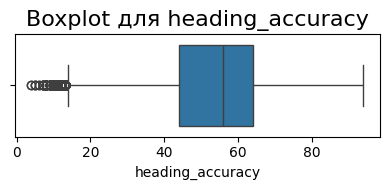

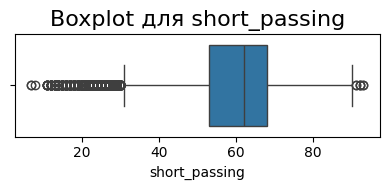

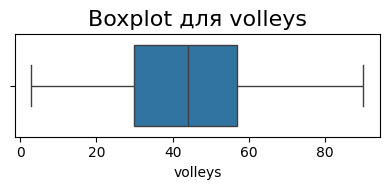

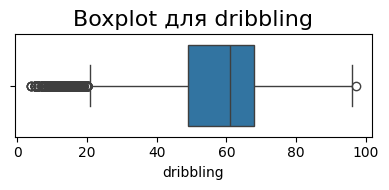

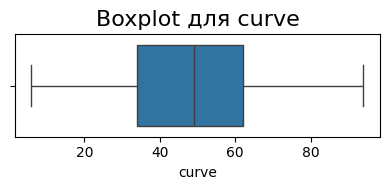

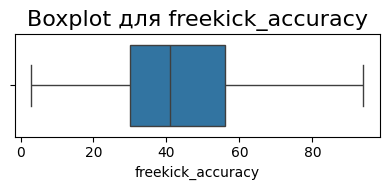

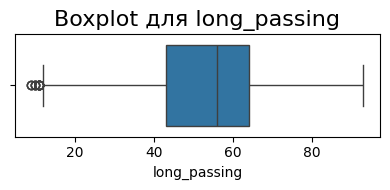

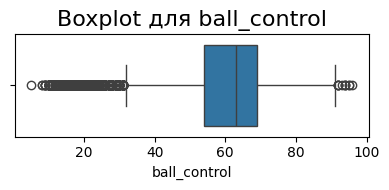

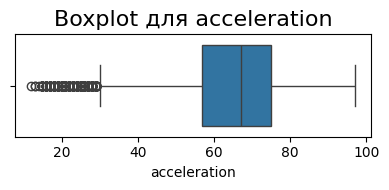

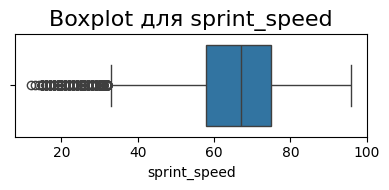

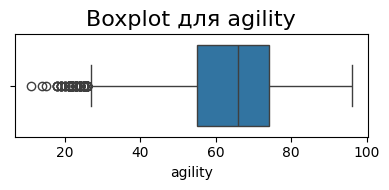

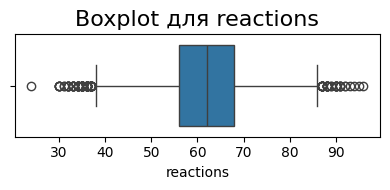

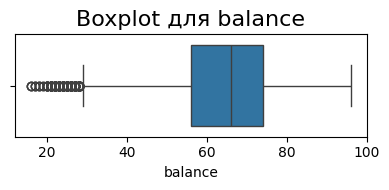

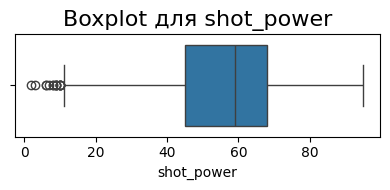

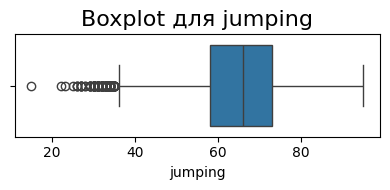

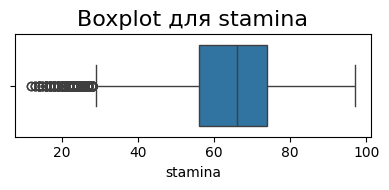

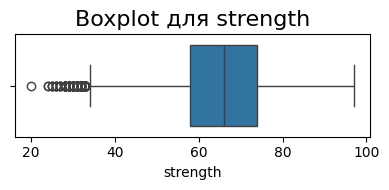

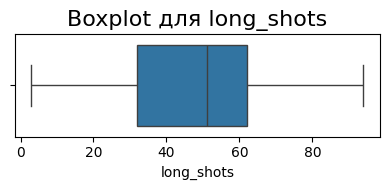

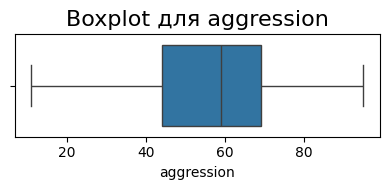

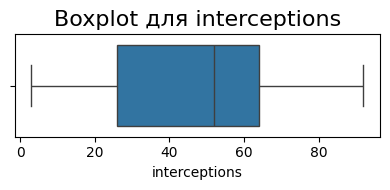

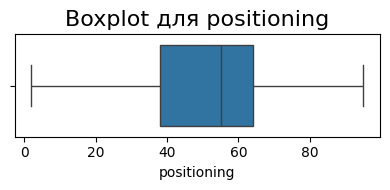

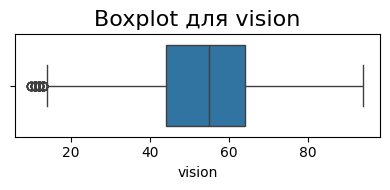

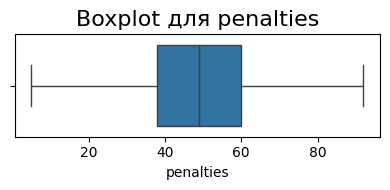

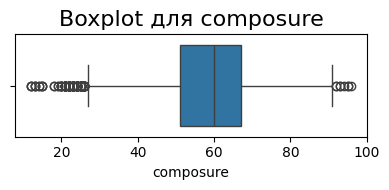

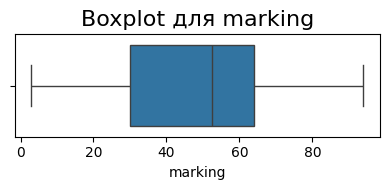

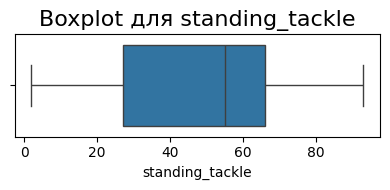

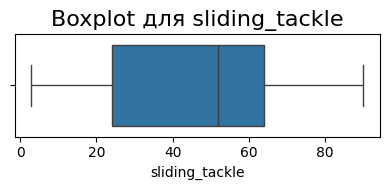

In [190]:
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

Пропуски в полях value_euro и wage_euro есть смысл заменить на медиану, так как распределение у них сильно скошено и есть очень много выбросов.

In [191]:
df['value_euro'] = df['value_euro'].fillna(df['value_euro'].median())
df['wage_euro'] = df['wage_euro'].fillna(df['wage_euro'].median())

In [192]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

#### Пропусков больше нет.

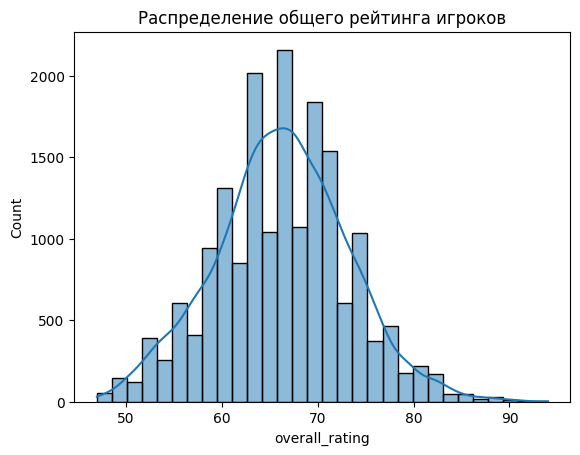

In [193]:
sns.histplot(df['overall_rating'], bins=30, kde=True)
plt.title('Распределение общего рейтинга игроков')
plt.show()

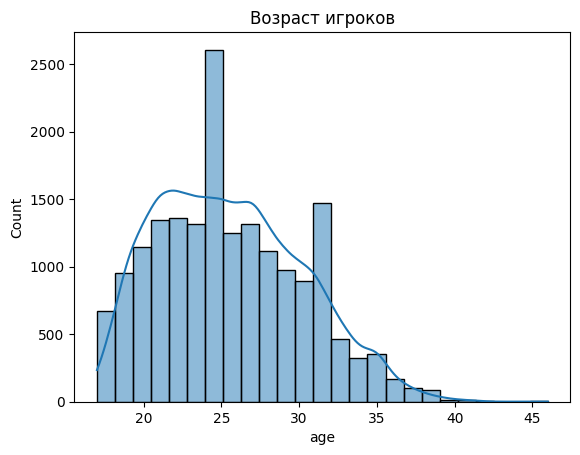

In [194]:
sns.histplot(df['age'], bins=25, kde=True)
plt.title('Возраст игроков')
plt.show()

Видим, что большинство игроков имеют рейтинг около 70 баллов.
Возраст большинства игроков около 25.

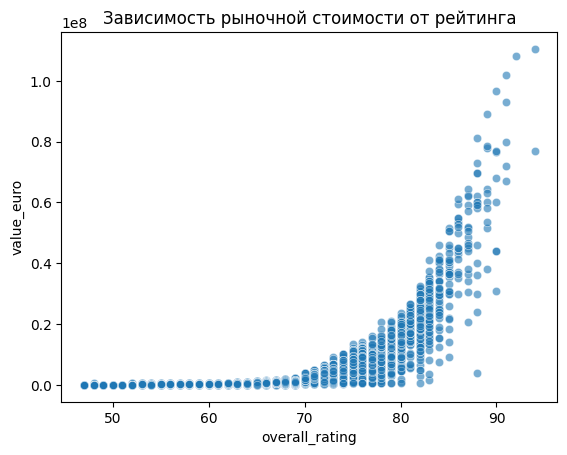

In [195]:
sns.scatterplot(data=df, x='overall_rating', y='value_euro', alpha=0.6)
plt.title('Зависимость рыночной стоимости от рейтинга')
plt.show()

Очевидно, что чем выше рейтинг, тем выше рыночная стоимость игрока.

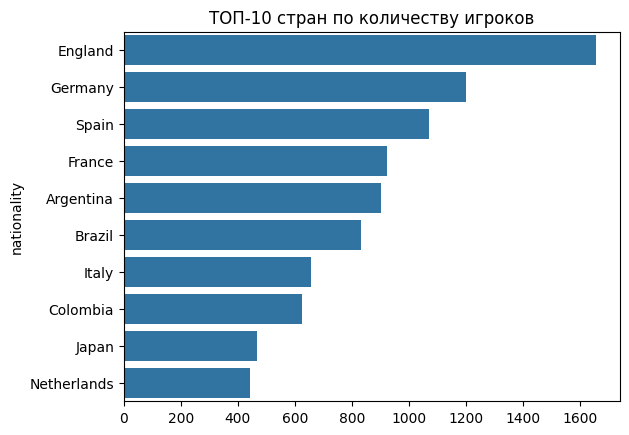

In [196]:
top_countries = df['nationality'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('ТОП-10 стран по количеству игроков')
plt.show()

Очевидно, что больше всего футболистов из родины футбола - Англии.

Помимо этого, можно заметить, что позиции у нас перечисляются через запятую, причём "CF", "RW" и "CF,RW" - это совершенно разные для модели сущности.

Проведём One-Hot Encoding для этого столбца.

In [197]:
positions_dummies = df['positions'].str.get_dummies(sep=',')
df = pd.concat([df, positions_dummies], axis=1)
df.drop('positions', axis=1, inplace=True)
df.head()

full_name  age  height_cm  weight_kgs nationality  \
0  Lionel Andrés Messi Cuccittini   31     170.18        72.1   Argentina   
1    Christian  Dannemann Eriksen   27     154.94        76.2     Denmark   
2                      Paul Pogba   25     190.50        83.9      France   
3                 Lorenzo Insigne   27     162.56        59.0       Italy   
4               Kalidou Koulibaly   27     187.96        88.9     Senegal   

   overall_rating  potential   value_euro  wage_euro preferred_foot  \
0              94         94  110500000.0   565000.0           Left   
1              88         89   69500000.0   205000.0          Right   
2              88         91   73000000.0   255000.0          Right   
3              88         88   62000000.0   165000.0          Right   
4              88         91   60000000.0   135000.0          Right   

   international_reputation(1-5)  weak_foot(1-5)  skill_moves(1-5) body_type  \
0                              5               4                 4     Messi   
1                              3               5                 4      Lean   
2                              4               4                 5    Normal   
3                              3               4                 4    Normal   
4                              3               3                 2    Normal   

   crossing  finishing  heading_accuracy  short_passing  volleys  dribbling  \
0        86         95                70             92       86         97   
1        88         81                52             91       80         84   
2        80         75                75             86       85         87   
3        86         77                56             85       74         90   
4        30         22                83             68       14         69   

   curve  freekick_accuracy  long_passing  ball_control  acceleration  \
0     93                 94            89            96            91   
1     86                 87            89            91            76   
2     85                 82            90            90            71   
3     87                 77            78            93            94   
4     28                 28            60            63            70   

   sprint_speed  agility  reactions  balance  shot_power  jumping  stamina  \
0            86       93         95       95          85       68       72   
1            73       80         88       81          84       50       92   
2            79       76         82       66          90       83       88   
3            86       94         83       93          75       53       75   
4            75       50         82       40          55       81       75   

   strength  long_shots  aggression  interceptions  positioning  vision  \
0        66          94          48             22           94      94   
1        58          89          46             56           84      91   
2        87          82          78             64           82      88   
3        44          84          34             26           83      87   
4        94          15          87             88           24      49   

   penalties  composure  marking  standing_tackle  sliding_tackle  CAM  CB  \
0         75         96       33               28              26    0   0   
1         67         88       59               57              22    1   0   
2         82         87       63               67              67    1   0   
3         61         83       51               24              22    0   0   
4         33         80       91               88              87    0   1   

   CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  RWB  ST  
0    0   1   0   0   0   0   0    0   0   0   1    0   1  
1    0   0   1   0   0   0   0    0   0   1   0    0   0  
2    0   0   1   0   0   0   0    0   0   0   0    0   0  
3    0   0   0   0   0   0   1    0   0   0   0    0   1  
4    0   0   0   0   0   0   0    0   0   0   0    0   

| Позиция | Описание |
|---------|----------|
| ST      | Главный нападающий (Striker), цель — забивать голы |
| CB      | Центральный защитник (Central Back), отвечает за оборону |
| CM      | Центральный полузащитник (Central Midfielder), связывает оборону и атаку |
| GK      | Вратарь (Goalkeeper), защищает ворота |
| CAM     | Атакующий полузащитник (Central Attacking Midfielder), создает голевые моменты |
| RM      | Правый полузащитник (Right Midfielder), играет на правом фланге |
| LM      | Левый полузащитник (Left Midfielder), играет на левом фланге |
| CF      | Центральный нападающий (Center Forward), поддерживает атаку |
| RW      | Правый вингер (Right Winger), атакует по правому флангу |
| LW      | Левый вингер (Left Winger), атакует по левому флангу |
| CDM     | Опорный полузащитник (Central Defensive Midfielder), защищает оборону и раздает передачи |
| RB      | Правый защитник (Right Back), обороняет и поддерживает атаку справа |
| LB      | Левый защитник (Left Back), обороняет и поддерживает атаку слева |
| RWB     | Правый винг-бэк (Right Wing Back), комбинирует защиту и атаку на правом фланге |
| LWB     | Левый винг-бэк (Left Wing Back), комбинирует защиту и атаку на левом фланге |


In [209]:
positions_count = positions_dummies.sum().sort_values(ascending=False)
positions_count

CM     3795
CB     3675
ST     3173
CDM    2699
LM     2521
RM     2452
CAM    2185
GK     2065
RB     2057
LB     2039
LW      957
RW      941
CF      362
RWB     314
LWB     299
dtype: int64

# Статистический анализ футбольного датасета с помощью SciPy


## 📊 P-value и ошибки I и II рода

### 🔹 Что такое p-value

**p-value** — это вероятность получить наблюдаемые данные (или ещё более экстремальные),  
если **нулевая гипотеза (H₀)** на самом деле **верна**.

> Формально:  
$$
( p_{value} = P(\text{данные} \mid H_0 \text{ верна}))
$$

---

### 🔹 Уровень значимости (α)

**α (альфа)** — заранее выбранный порог, при котором мы решаем,  
считать ли результат статистически значимым.

Обычно:
- α = 0.05 (5%) — стандарт в большинстве исследований  
- α = 0.01 — строгий уровень  
- α = 0.1 — допустимо в разведочном анализе (EDA)

Если выполняется условие:

$$
p_{value} < \alpha \;\Rightarrow\; \text{отвергаем } H_{0}
$$

а если

$$
p_{value} \geq \alpha \;\Rightarrow\; \text{не отвергаем } H_{0}
$$
---

### ⚖️ Ошибки статистического вывода

| Ошибка | Обозначение | Что означает | Пример |
|---------|--------------|---------------|---------|
| **I рода** | α | Отвергли H₀, хотя она верна | Считаем, что связь есть, хотя на самом деле её нет |
| **II рода** | β | Не отвергли H₀, хотя она ложна | Не заметили существующую связь |

---

### 📈 Как это выглядит

| Истинное состояние | Решение теста | Результат |
|--------------------|----------------|------------|
| H₀ верна | Отвергаем H₀ | Ошибка I рода |
| H₀ верна | Не отвергаем H₀ | Правильное решение |
| H₀ ложна | Отвергаем H₀ | Правильное решение |
| H₀ ложна | Не отвергаем H₀ | Ошибка II рода |

---

### Короче говоря:

- **p-value** говорит о **достоверности** эффекта,  
  а не о его **величине** или **важности**.  
- **α = 0.05** — это **порог уверенности**, а не закон.  
- **Ошибка I рода (α)** — ложная тревога.  
- **Ошибка II рода (β)** — пропущенный сигнал.



### Тест 1. Корреляция Пирсона: `pearsonr(x, y)`

**Ввод:**  
- `x = df['height_cm']` — рост игроков  
- `y = df['overall_rating']` — текущий рейтинг  

**Цель:**  
- Проверить линейную зависимость между ростом и рейтингом.  
- H0: рост и рейтинг не связаны  
- H1: есть линейная зависимость  

**Формула коэффициента Пирсона:**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

**t-статистика для p-value:**

$$
t = r \sqrt{\frac{n-2}{1-r^2}}, \quad df = n-2
$$


In [198]:
from scipy.stats import pearsonr

r, p_value = pearsonr(df['height_cm'], df['overall_rating'])
print(f"Рост vs рейтинг: r = {r}, p_value = {p_value}")

Рост vs рейтинг: r = 0.03807987326948088, p_value = 3.326983930662683e-07


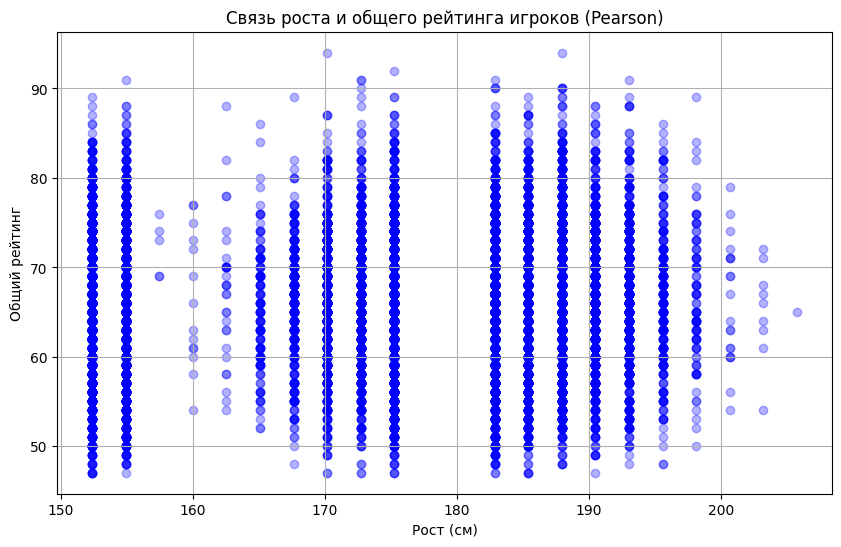

In [199]:
plt.figure(figsize=(10, 6))
plt.scatter(df['height_cm'], df['overall_rating'], alpha=0.3, color='blue')
plt.xlabel('Рост (см)')
plt.ylabel('Общий рейтинг')
plt.title('Связь роста и общего рейтинга игроков (Pearson)')
plt.grid(True)
plt.show()

#### Вывод: линейной связи между ростом и рейтингом практически нет. Отклоняем H0, но корреляция очень маленькая.

### Тест 2. Корреляция Спирмена: `spearmanr(x, y)`

**Ввод:**  
- `x = df['age']` — возраст игроков  
- `y = delta = df['potential'] - df['overall_rating']` — разрыв между потенциалом и текущим рейтингом  

**Цель:**  
- Проверить монотонную зависимость между возрастом и разницей потенциала без предположения о линейности или нормальности данных.  
- H0: нет монотонной зависимости  
- H1: существует монотонная зависимость  

**Формула коэффициента Спирмена:**

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2-1)}
$$

где \(d_i\) — разница рангов между x и y, \(n\) — количество наблюдений  


In [200]:
from scipy.stats import spearmanr

df['delta'] = df['potential'] - df['overall_rating']
rho, p_value = spearmanr(df['age'], df['delta'])
print(f"rho = {rho}, p_value = {p_value}")

rho = -0.9548501562493051, p_value = 0.0


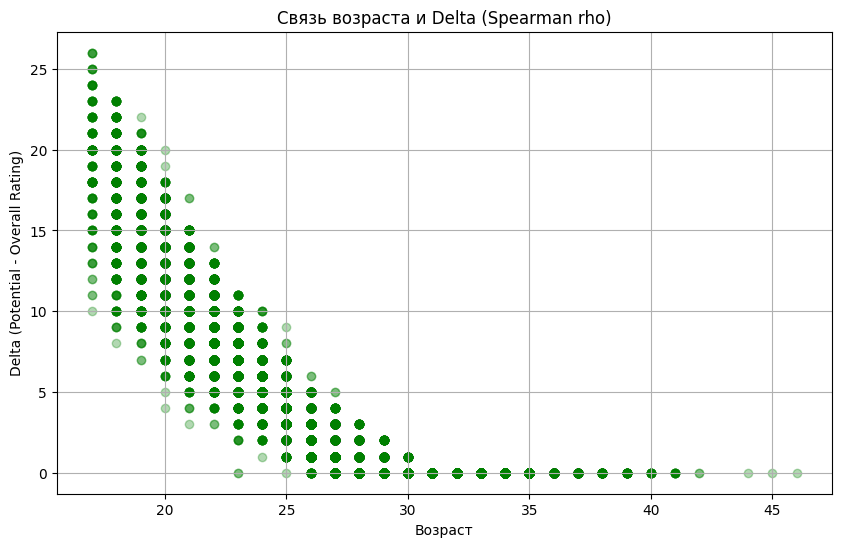

In [201]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['delta'], alpha=0.3, color='green')
plt.xlabel('Возраст')
plt.ylabel('Delta (Potential - Overall Rating)')
plt.title('Связь возраста и Delta (Spearman rho)')
plt.grid(True)
plt.show()

#### Вывод: когда разница потенциала увеличивается, рейтинг уменьшается, и делает это почти идеально монотонно. Отклоняем H0

### Тест 3. t-test: `ttest_ind(a, b, equal_var=False)` для правшей и левшей
#### Гипотеза: средние рейтинги правшей и левшей сильно отличаются.

**Ввод:**  
- Две группы по признаку `preferred_foot`: `'Right'` и `'Left'`  
- `y = df['overall_rating']` — общий рейтинг игроков  

**Цель:**  
- Проверить, отличаются ли средние рейтинги правшей и левшей.  
- H0: средние значения рейтинга правшей и левшей равны  
- H1: средние значения различаются  

**t-статистика (Welch t-test):**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

где:  
- \(x_1, x_2\) $$ — средние группы  
- \(s_1^2, s_2^2\) — дисперсии групп  
- \(n_1, n_2\) — размеры групп  

In [202]:
from scipy.stats import ttest_ind

right_rating = df[df['preferred_foot']=='Right']['overall_rating']
left_rating = df[df['preferred_foot']=='Left']['overall_rating']

t_stat, p_value = ttest_ind(right_rating, left_rating, equal_var=False)
print(f"t = {t_stat}, p_value = {p_value}")

t = -6.658717940399008, p_value = 2.961805202741735e-11


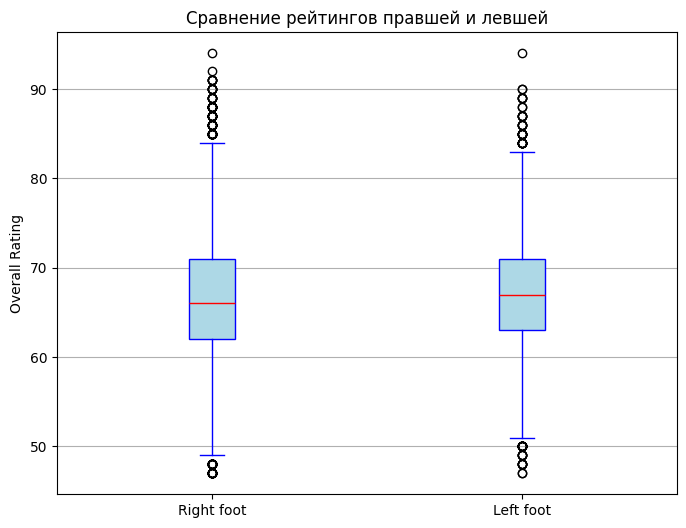

In [203]:
plt.figure(figsize=(8, 6))
plt.boxplot([right_rating, left_rating], 
            tick_labels=['Right foot', 'Left foot'], 
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.ylabel('Overall Rating')
plt.title('Сравнение рейтингов правшей и левшей')
plt.grid(axis='y')
plt.show()

#### Вывод: как ни странно, но средний рейтинг у правшей и левшей отличается, причём у левшей он лучше. Отклоняем H0.

### Тест 4. Chi-square: `chi2_contingency(table)`

**Ввод:**  
- Таблица сопряженности: зарплата × национальности  
- Признаки: `wage_euro` и `nationality`  

**Цель:**  
- Проверить зависимость категориальных переменных: зарплата и национальности игроков.  
- H0: зарплата и национальности независимы  
- H1: зарплата и национальности связаны  

**χ²-статистика:**

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

где:  
- \(O_i\) — наблюдаемое количество  
- \(E_i\) — ожидаемое количество при H0 (независимость)  


In [204]:
import pandas as pd
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['wage_euro'], df['nationality'])
chi2, p_value, dof, expected = chi2_contingency(cont_table)
print(f"chi2 = {chi2}, p_value = {p_value}")

chi2 = 19197.846829991606, p_value = 1.0


/var/folders/61/m2p_jb3d5w983f1zs5951tbw0000gn/T/ipykernel_14921/882710686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='nationality', y='log_wage', data=df, palette='coolwarm')


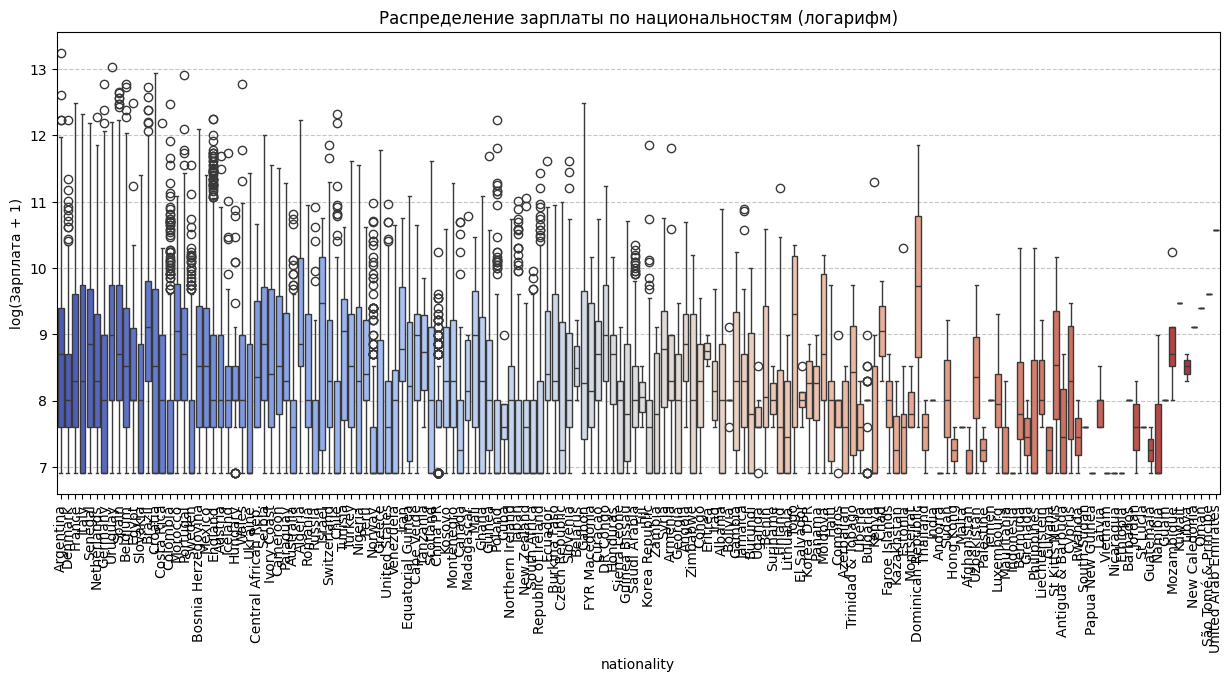

In [205]:
df['log_wage'] = np.log1p(df['wage_euro'])  # log1p = log(1 + x), чтобы избежать log(0)

plt.figure(figsize=(15, 6))
sns.boxplot(x='nationality', y='log_wage', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('log(Зарплата + 1)')
plt.title('Распределение зарплаты по национальностям (логарифм)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Вывод: p_value слишком большой, то есть статистика не доказывает, что зарплата и национальности связаны. Не отвергаем H0.

### Тест 5. Линейная регрессия: `linregress(x, y)`

**Ввод:**  
- `x = df['age']` — возраст игроков  
- `y = df['overall_rating']` — общий рейтинг игроков  

**Цель:**  
- Проверить наличие линейного тренда между возрастом и рейтингом.  
- H0: наклон линии равен 0 (нет линейной зависимости)  
- H1: существует линейная зависимость  

**Модель линейной регрессии:**

$$
y = slope \cdot x + intercept
$$

где:  
- `slope` — коэффициент наклона линии  
- `intercept` — пересечение с осью Y  

In [206]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['age'], df['overall_rating'])
print("slope =", slope)
print("intercept =", intercept)
print("r_value =", r_value)
print("p_value =", p_value)
print("std_err =", std_err)

slope = 0.6829928431273516
intercept = 48.7791533373543
r_value = 0.4615292213212571
p_value = 0.0
std_err = 0.009798178600547706


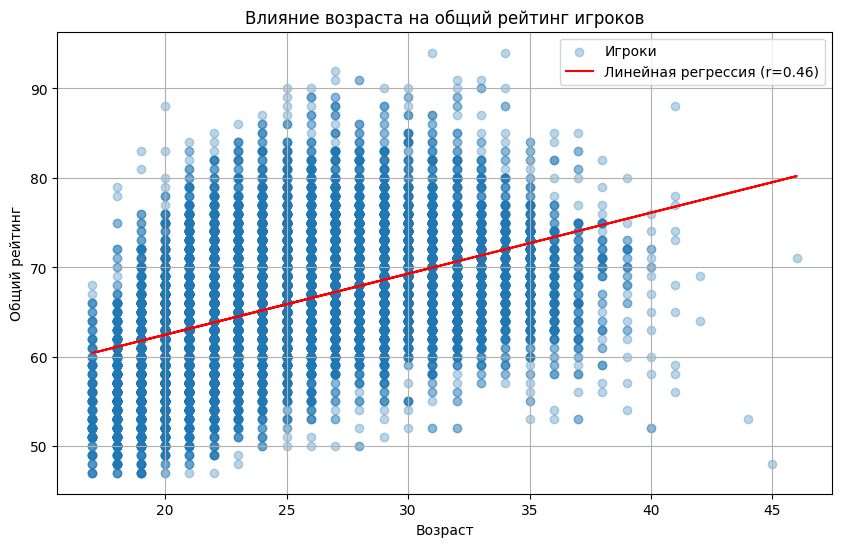

In [207]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['overall_rating'], alpha=0.3, label='Игроки')
plt.plot(df['age'], slope * df['age'] + intercept, color='red', label=f'Линейная регрессия (r={r_value:.2f})')
plt.xlabel('Возраст')
plt.ylabel('Общий рейтинг')
plt.title('Влияние возраста на общий рейтинг игроков')
plt.legend()
plt.grid(True)
plt.show()

#### Вывод: корреляция умеренная, с возрастом рейтинг в основном растёт. Отклоняем H0.

### Тест 6. Сравнение зарплат нападающих и защитников (Welch t-test)

**Ввод:**  
- Две группы по позиции:  
  - Нападающие (`Forward`) → объединяем позиции `ST`, `CF`, `LW`, `RW`  
  - Защитники (`Defense`) → объединяем позиции `CB`, `LB`, `RB`, `LWB`, `RWB`  
- `y = df['wage_euro']` — зарплата игроков  

**Цель:**  
- Проверить, отличаются ли средние зарплаты нападающих и защитников  
- **H0:** средние зарплаты нападающих и защитников равны  
- **H1:** средние зарплаты различаются  

**t-статистика (Welch t-test):**

$$
t = \frac{\bar{x}_\text{Forward} - \bar{x}_\text{Defense}}{\sqrt{\frac{s_\text{Forward}^2}{n_\text{Forward}} + \frac{s_\text{Defense}^2}{n_\text{Defense}}}}
$$

где:  
- x — средние зарплаты групп  
- \(s^2\) — дисперсии групп  
- \(n\) — размеры групп  


In [210]:
from scipy.stats import ttest_ind

# Определяем позиции
forward_positions = ['ST', 'CF', 'LW', 'RW']
defense_positions = ['CB', 'LB', 'RB', 'LWB', 'RWB']

# Отбираем игроков по группам (используя one-hot столбцы)
forward_mask = df[forward_positions].any(axis=1)
defense_mask = df[defense_positions].any(axis=1)

forward_wage = df.loc[forward_mask, 'wage_euro']
defense_wage = df.loc[defense_mask, 'wage_euro']

# Welch t-test
t_stat, p_value = ttest_ind(forward_wage, defense_wage, equal_var=False)
print(f"t = {t_stat}, p_value = {p_value}")

t = 7.157603536291346, p_value = 9.084143180403452e-13


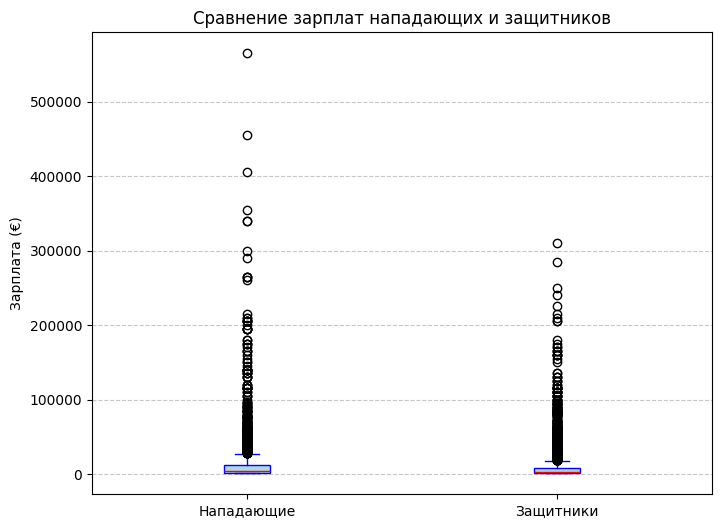

In [215]:
plt.figure(figsize=(8, 6))
plt.boxplot([forward_wage, defense_wage], 
            tick_labels=['Нападающие', 'Защитники'], 
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))
plt.ylabel('Зарплата (€)')
plt.title('Сравнение зарплат нападающих и защитников')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Вывод: средняя зарплата у нападающих выше, чем у защитников. Отвергаем H0.

### Тест 7. Сравнение потенциала игроков с высоким и низким общим рейтингом

**Ввод:**  
- Две группы по `overall_rating`:  
  - Высокий рейтинг → `overall_rating >= 75`  
  - Низкий рейтинг → `overall_rating < 75`  
- `y = df['potential']` — потенциальный рейтинг игроков  

**Цель:**  
- Проверить, отличается ли средний потенциал у сильных и слабых игроков  
- Рассчитать 95% доверительный интервал для разницы средних  
- **H0:** средний потенциал одинаков  
- **H1:** средний потенциал различается  


##### Определение
Доверительный интервал — это диапазон значений, $ \text{в котором с заданной вероятностью находится истинное значение параметра} $ (например, среднего или разницы средних).  
Обычно задают уровень доверия 95\% или 99\%.

##### Формула для разницы средних двух независимых выборок (Welch t-test)

$$
CI = (\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2, df} \cdot \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
$$

где:  
- $ \bar{x}_1, \bar{x}_2 $ — средние значения групп  
- $ s_1^2, s_2^2 $ — дисперсии групп  
- $ n_1, n_2 $ — размеры выборок  
- $ t_{\alpha/2, df} $ — критическое t-значение для уровня доверия $1-\alpha$ и степеней свободы $df$  

##### Степени свободы

$$
df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}
          {\frac{(s_1^2/n_1)^2}{n_1 - 1} + \frac{(s_2^2/n_2)^2}{n_2 - 1}}
$$

Используется для корректной оценки дисперсии при $ \text{неравных дисперсиях групп} $.

##### Интерпретация
- Если $ CI $ не содержит 0, различие средних статистически значимо.  
- Если $ CI $ содержит 0, различие средних может быть случайным.  
- Ширина интервала показывает $ \text{неопределённость оценки} $: узкий CI → высокая точность, широкий CI → низкая точность.

In [216]:
from scipy import stats

# Разделяем группы
high_rating = df[df['overall_rating'] >= 75]['potential']
low_rating = df[df['overall_rating'] < 75]['potential']

# Welch t-test
t_stat, p_value = stats.ttest_ind(high_rating, low_rating, equal_var=False)

# Разница средних
mean_diff = high_rating.mean() - low_rating.mean()

# Стандартная ошибка
se_diff = np.sqrt(high_rating.var(ddof=1)/len(high_rating) + low_rating.var(ddof=1)/len(low_rating))

# Степени свободы (Welch-Satterthwaite)
df_welch = (high_rating.var(ddof=1)/len(high_rating) + low_rating.var(ddof=1)/len(low_rating))**2 / \
           ((high_rating.var(ddof=1)/len(high_rating))**2 / (len(high_rating)-1) + \
            (low_rating.var(ddof=1)/len(low_rating))**2 / (len(low_rating)-1))

# 95% доверительный интервал
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df_welch)
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff

print(f"t = {t_stat:.3f}, p_value = {p_value:.3e}")
print(f"Разница средних: {mean_diff:.2f}")
print(f"95% доверительный интервал: [{ci_lower:.2f}, {ci_upper:.2f}]")


t = 98.260, p_value = 0.000e+00
Разница средних: 9.97
95% доверительный интервал: [9.77, 10.17]


Игроки с высоким общим рейтингом имеют значимо больший потенциал, чем игроки с низким рейтингом, и это различие практически невозможно объяснить случайностью.